# Setting up libraries needed

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pickle
import os

# Get the user and topic embeddings 

In [0]:
path = '/content/drive/My Drive/sample_data/'
out_path = '/content/drive/My Drive/LDA results/'
results_path = '/content/drive/My Drive/LDA-maxpool emb viz/'

user_vectors = np.loadtxt(out_path + "GH_past_topic25_beta0.005_user_embeddings.csv", delimiter=",")
topic_vectors = np.loadtxt(out_path + "GH_past_topic25_beta0.005_topic_embeddings.csv", delimiter=",")

Store both user and topic embeddings in a dictionary

In [0]:
num_topics = 25

high_dim_vectors = {}
for id in range(0, user_vectors.shape[0]):
    high_dim_vectors["u_" + str(id)] = user_vectors[id]

#for topic_num in range(0,num_topics):
#    high_dim_vectors['T_' + str(topic_num + 1)] = topic_vectors[topic_num]

Set up data frame to store results

In [0]:
topic_vecs = {}
for topic_num in range(0,num_topics):
    topic_vecs['T_' + str(topic_num + 1)] = topic_vectors[topic_num]

In [0]:
data_subset = pd.DataFrame(data=high_dim_vectors)
df = data_subset.T

topics = pd.DataFrame(data=topic_vecs)
df_topics = topics.T

In [8]:
df_topics.index = ['T'] * num_topics
df_topics

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
T,0.079888,0.005639,0.002773,0.003871,0.007809,0.009967,0.005843,0.010790,0.010083,0.007665,0.018002,0.014776,0.009943,0.008168,0.024012,0.031910,0.003087,0.010991,0.004172,0.007885,0.003404,0.005716,0.016940,0.005749,0.024427
T,0.003004,0.111444,0.006186,0.014103,0.015663,0.007258,0.017649,0.015609,0.007570,0.012653,0.006517,0.021593,0.035273,0.018597,0.012621,0.007511,0.051281,0.048169,0.015863,0.016970,0.002256,0.008613,0.008340,0.011923,0.007374
T,0.003656,0.028471,0.022625,0.003713,0.008629,0.004301,0.004929,0.004167,0.006637,0.002474,0.002459,0.006384,0.002356,0.001674,0.001845,0.007704,0.001862,0.014599,0.009815,0.003551,0.011739,0.004420,0.003482,0.358037,0.006883
T,0.006117,0.013877,0.005043,0.076487,0.012803,0.022862,0.016369,0.015922,0.009760,0.010158,0.006512,0.070243,0.004913,0.012086,0.010677,0.009940,0.051281,0.017257,0.008854,0.003892,0.005034,0.213437,0.027751,0.023682,0.007330
T,0.013621,0.023193,0.018169,0.009972,0.095948,0.012470,0.017649,0.015609,0.010083,0.332274,0.006517,0.021593,0.003612,0.008168,0.024012,0.007511,0.007202,0.048169,0.015863,0.005494,0.003636,0.008613,0.019673,0.023682,0.007374
T,0.009967,0.002809,0.004697,0.037656,0.012769,0.100633,0.005843,0.040156,0.005883,0.009147,0.003486,0.070243,0.006187,0.007189,0.006009,0.044166,0.003703,0.021700,0.004172,0.004322,0.005025,0.213437,0.003697,0.004433,0.007451
T,0.013621,0.009001,0.018169,0.009972,0.012803,0.009967,0.224275,0.003831,0.068823,0.012653,0.008235,0.018761,0.035273,0.018597,0.024012,0.013367,0.005806,0.013595,0.014360,0.016970,0.004531,0.008613,0.011680,0.023682,0.007374
T,0.009469,0.009640,0.004697,0.037656,0.008044,0.031866,0.004675,0.040156,0.007995,0.007288,0.017064,0.070243,0.013571,0.005103,0.011199,0.035193,0.007202,0.022733,0.015863,0.011814,0.008872,0.213437,0.013949,0.004141,0.024427
T,0.013621,0.007832,0.003334,0.009245,0.008552,0.007258,0.014090,0.015922,0.068823,0.009085,0.008235,0.018761,0.004913,0.008168,0.024012,0.013367,0.005124,0.010263,0.014360,0.005494,0.002272,0.008613,0.027751,0.008940,0.007374
T,0.009967,0.013877,0.005043,0.014103,0.022977,0.011635,0.017649,0.022819,0.007570,0.332274,0.017064,0.014499,0.035273,0.018597,0.012621,0.007511,0.051281,0.022733,0.015863,0.016970,0.008872,0.008613,0.019673,0.023682,0.024427


# Running TSNE on topic + word embeddings

In [0]:
df_percent = df.sample(frac=0.50)

df_final = df_percent.append(df_topics)

In [0]:
print(df_final.tail(100))

In [0]:
tsne_model = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=2500)
tsne_results = tsne_model.fit_transform(df_final)

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import csv

def silhouette_method(X):
  silhouette_scores = []
  for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For TSNE + k-Means with n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    silhouette_scores.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on GH_past data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig(out_path + 'TSNE_2D_GH_past_avgSilhouette_k-means_k=' + str(n_clusters) + '.png', bbox_inches='tight')
  print(silhouette_scores)
  #with open(result_file, 'w') as f:
  #  writer = csv.writer(f)
  #  writer.writerow(silhouette_scores)

# Run k-means on the TSNE 2D data

In [22]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
range_n_clusters = range(30,51)

silhouette_method(tsne_results)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
k_best = 20
clusterer = KMeans(n_clusters=k_best)
cluster_labels = clusterer.fit_predict(tsne_results)

# Visualize TSNE

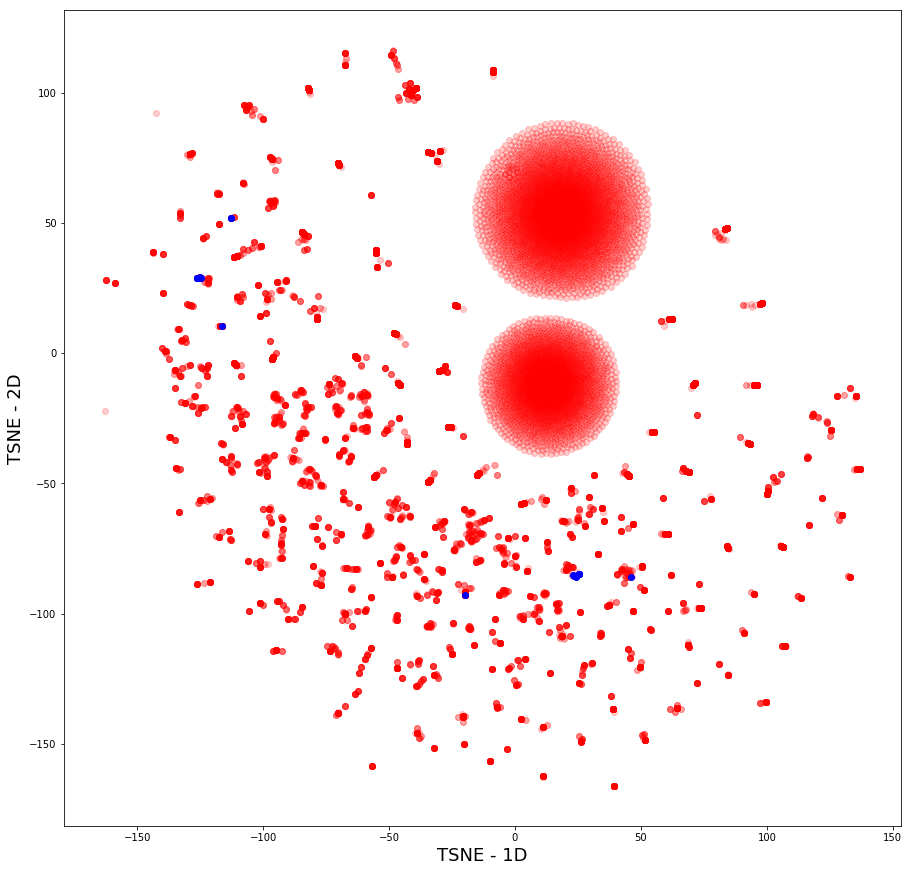

In [0]:
x = tsne_results[:,0]
y = tsne_results[:,1]

plt.figure(figsize=(15, 15)) 
for i in range(len(x)):
    if i > df_final.shape[0] - num_topics - 1:
        plt.scatter(x[i],y[i], c="blue", alpha = 1)
    else :
        plt.scatter(x[i],y[i], c="red", alpha = 0.2)
    #plt.annotate(df.index[82575+i], xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.xlabel('TSNE - 1D', fontsize=18)
plt.ylabel('TSNE - 2D', fontsize=18)
plt.show()

# Build LDA model

Import the proper libraries

In [0]:
from gensim.sklearn_api import LdaTransformer
import numpy as np
import io
from gensim.models import CoherenceModel, LdaModel, LsiModel
from gensim.corpora.dictionary import Dictionary
from gensim.corpora.mmcorpus import MmCorpus
from gensim.test.utils import datapath
import csv

Load in dictionary and corpus, then fit LDA

In [0]:
path = '/content/drive/My Drive/sample_data/'

dictionary = Dictionary.load(path + 'GH_past_full_activity_gensimDictionary.dict')
corpus = MmCorpus(datapath(path + 'corpus_GH_past.mm'))

k = 25
model = LdaTransformer(id2word=dictionary, num_topics=k, alpha='auto', eta=0.005, iterations=100, random_state=2019)
lda = model.fit(corpus)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


Create a look-up table for embeddings of a specific word

In [0]:
term_topic_matrix = lda.gensim_model.get_topics()
terms = []
for (key, value) in dictionary.iteritems():
  terms.append(value)

term_embeddings = pd.DataFrame(term_topic_matrix, columns=terms)

def embedding_lookup(word):
  return np.array(term_embeddings[word])

# Get topic words LDA embedding

In [0]:
topicWord_embeddings = []
unique_topicWord_embeddings = []

topics_index = []
topicWord_list = []
number_of_topicWords = 20

for topic_num in range(0, k):
  results = lda.gensim_model.show_topic(topic_num, topn=number_of_topicWords)
  word_list = []
  for i in range(0,number_of_topicWords):
    word = results[i][0]
    topicWord_list.append(word)
    word_list.append(word)

  for w in word_list:
    word_vector = embedding_lookup(w)
    topicWord_embeddings.append(word_vector)
    topics_index.append(topic_num+1)

unique_words = set(topicWord_list)

for w in unique_words:
  word_vector = embedding_lookup(w)
  unique_topicWord_embeddings.append(word_vector)

unique_topicWord_vectors = np.array(unique_topicWord_embeddings)
np.savetxt(out_path + "GH_past_topic25_beta0.005_UNIQUE_topicWord_embeddings.csv", unique_topicWord_vectors, delimiter=",")

topicWord_vectors = np.array(topicWord_embeddings)
np.savetxt(out_path + "GH_past_topic25_beta0.005_ALL_topicWord_embeddings.csv", topicWord_vectors, delimiter=",")

Save list of topic words to a file

In [0]:
import pickle
with open(out_path + "GH_past_topic25_beta0.005_listOfTopicWords.pkl", "wb") as fp:   #Pickling
  pickle.dump(topicWord_list, fp)

with open(out_path + "GH_past_topic25_beta0.005_listOfUniqueTopicWords.pkl", "wb") as fp:   #Pickling
  pickle.dump(unique_words, fp)

Set up Pandas df for topicWord embeddings

In [0]:
df_topicwords = pd.DataFrame(data=topicWord_vectors, index=topics_index)
print(df_topicwords)

Merge topicWord embeddings with topic embeddings

In [0]:
#df_final = df.append(df_topics)

df_final = df_topicwords.append(df_topics)

In [0]:
df_final

# Run TSNE on Topic_words + Topic Embedddings

In [0]:
tsne_model_5 = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=5000)
tsne_model_10 = TSNE(n_components=2, verbose=0, perplexity=10, n_iter=5000)
tsne_model_20 = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=5000)
tsne_model_30 = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=5000)
tsne_model_40 = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=5000)
tsne_model_50 = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=5000)

tsne_topicWords_5 = tsne_model_5.fit_transform(df_final)
tsne_topicWords_10 = tsne_model_10.fit_transform(df_final)
tsne_topicWords_20 = tsne_model_20.fit_transform(df_final)
tsne_topicWords_30 = tsne_model_30.fit_transform(df_final)
tsne_topicWords_40 = tsne_model_40.fit_transform(df_final)
tsne_topicWords_50 = tsne_model_50.fit_transform(df_final)

# Visualize TSNE for Topic_words and Topic embeddings

In [0]:
df_final['class'] = df_final.index

df_final['tsne-p5-one'] = tsne_topicWords_5[:,0]
df_final['tsne-p5-two'] = tsne_topicWords_5[:,1]

df_final['tsne-p10-one'] = tsne_topicWords_10[:,0]
df_final['tsne-p10-two'] = tsne_topicWords_10[:,1]

df_final['tsne-p20-one'] = tsne_topicWords_20[:,0]
df_final['tsne-p20-two'] = tsne_topicWords_20[:,1]

df_final['tsne-p30-one'] = tsne_topicWords_30[:,0]
df_final['tsne-p30-two'] = tsne_topicWords_30[:,1]

df_final['tsne-p40-one'] = tsne_topicWords_40[:,0]
df_final['tsne-p40-two'] = tsne_topicWords_40[:,1]

df_final['tsne-p50-one'] = tsne_topicWords_50[:,0]
df_final['tsne-p50-two'] = tsne_topicWords_50[:,1]

In [0]:
def plot_tsne(x,y, k):
  plt.figure(figsize=(16,10))
  p1 = sns.scatterplot(
    x=x, y=y,
    hue="class",
    palette=sns.color_palette("hls", k+1),
    data=df_final,
    legend="full",
    alpha=1
  )
  x = list(df_final[x]["T"])
  y = list(df_final[y]["T"])
  labels = list(range(1,k+1))

  for i, txt in enumerate(labels):
      p1.annotate(txt, (x[i], y[i]))

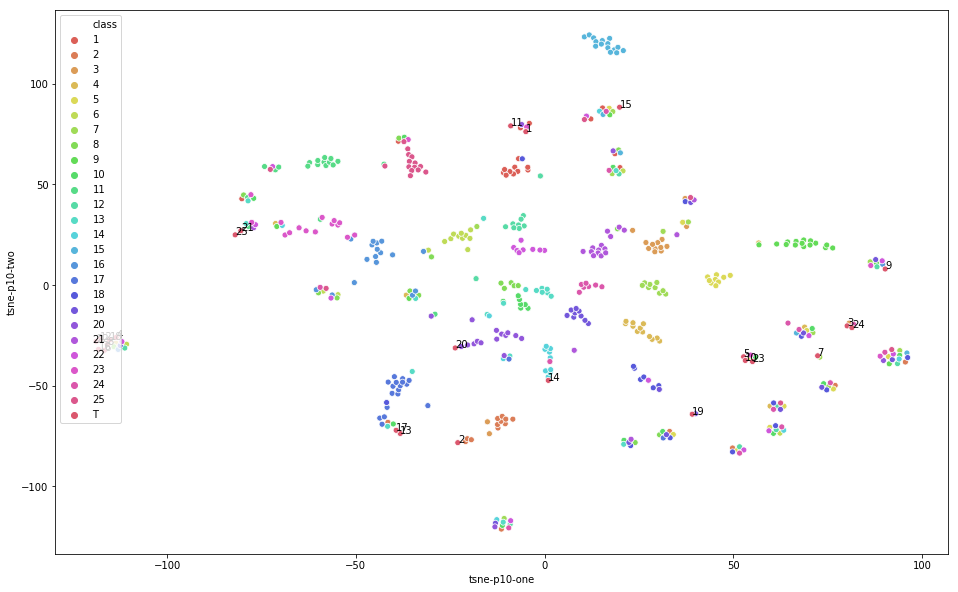

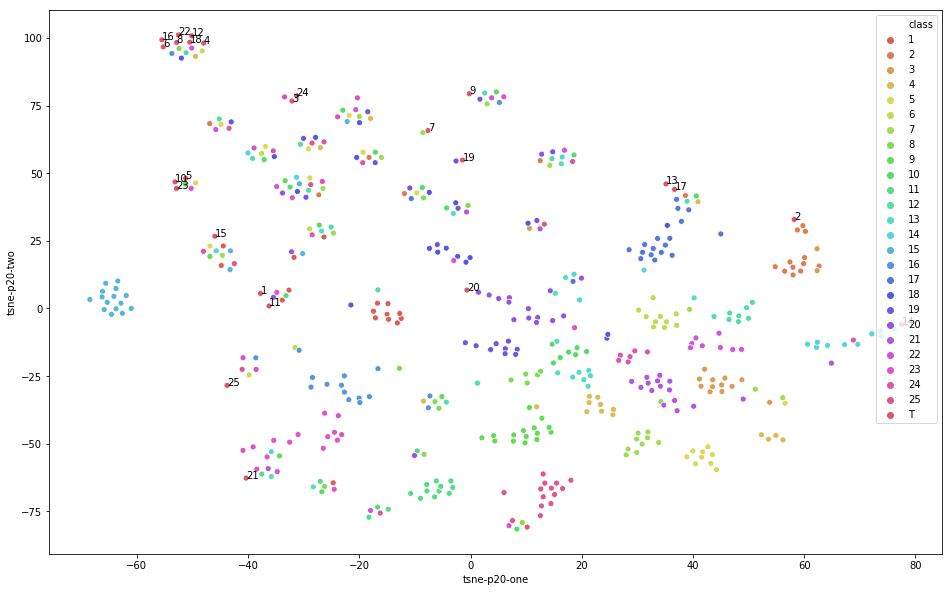

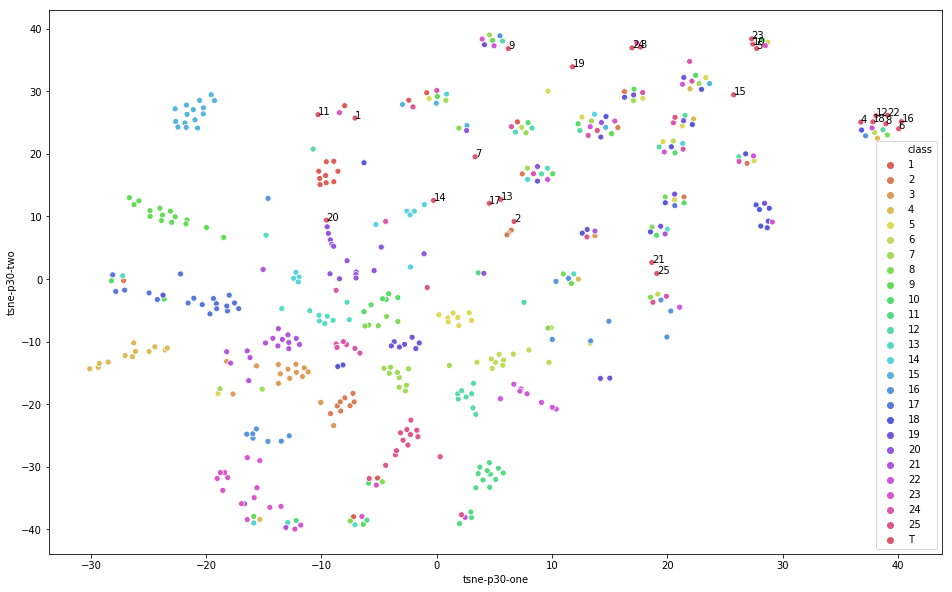

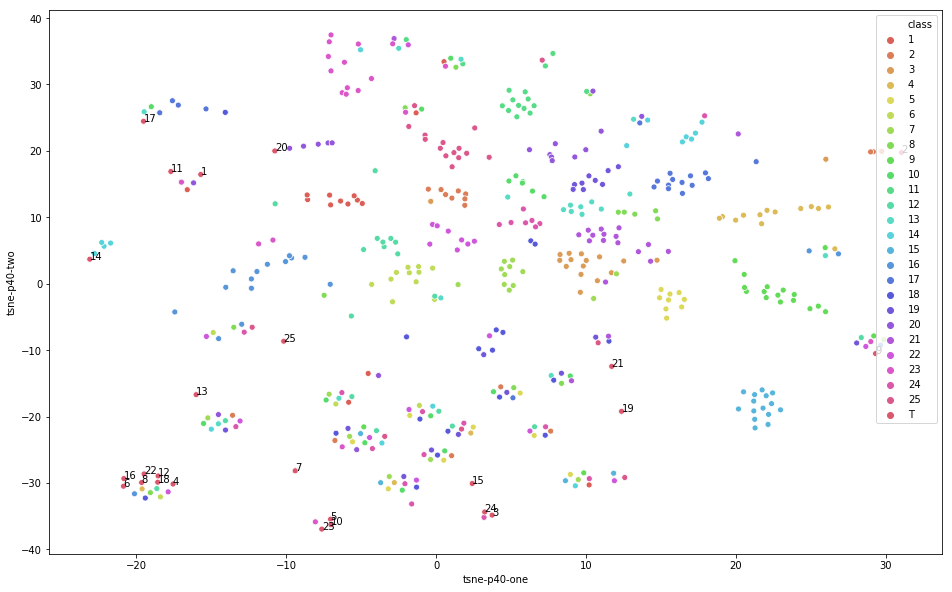

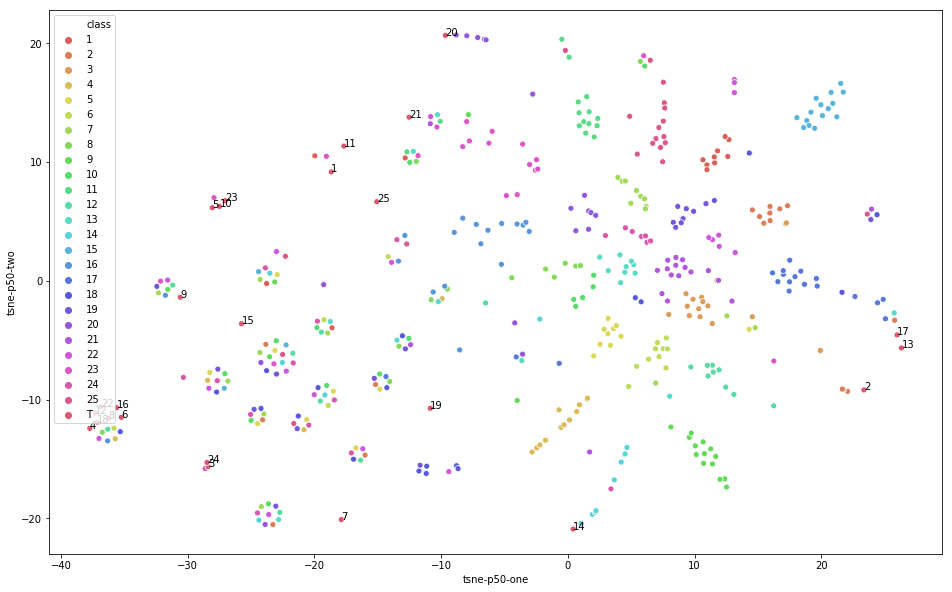

In [0]:
plot_tsne('tsne-p10-one', 'tsne-p10-two', 25)

plot_tsne('tsne-p20-one', 'tsne-p20-two', 25)

plot_tsne('tsne-p30-one', 'tsne-p30-two', 25)

plot_tsne('tsne-p40-one', 'tsne-p40-two', 25)

plot_tsne('tsne-p50-one', 'tsne-p50-two', 25)


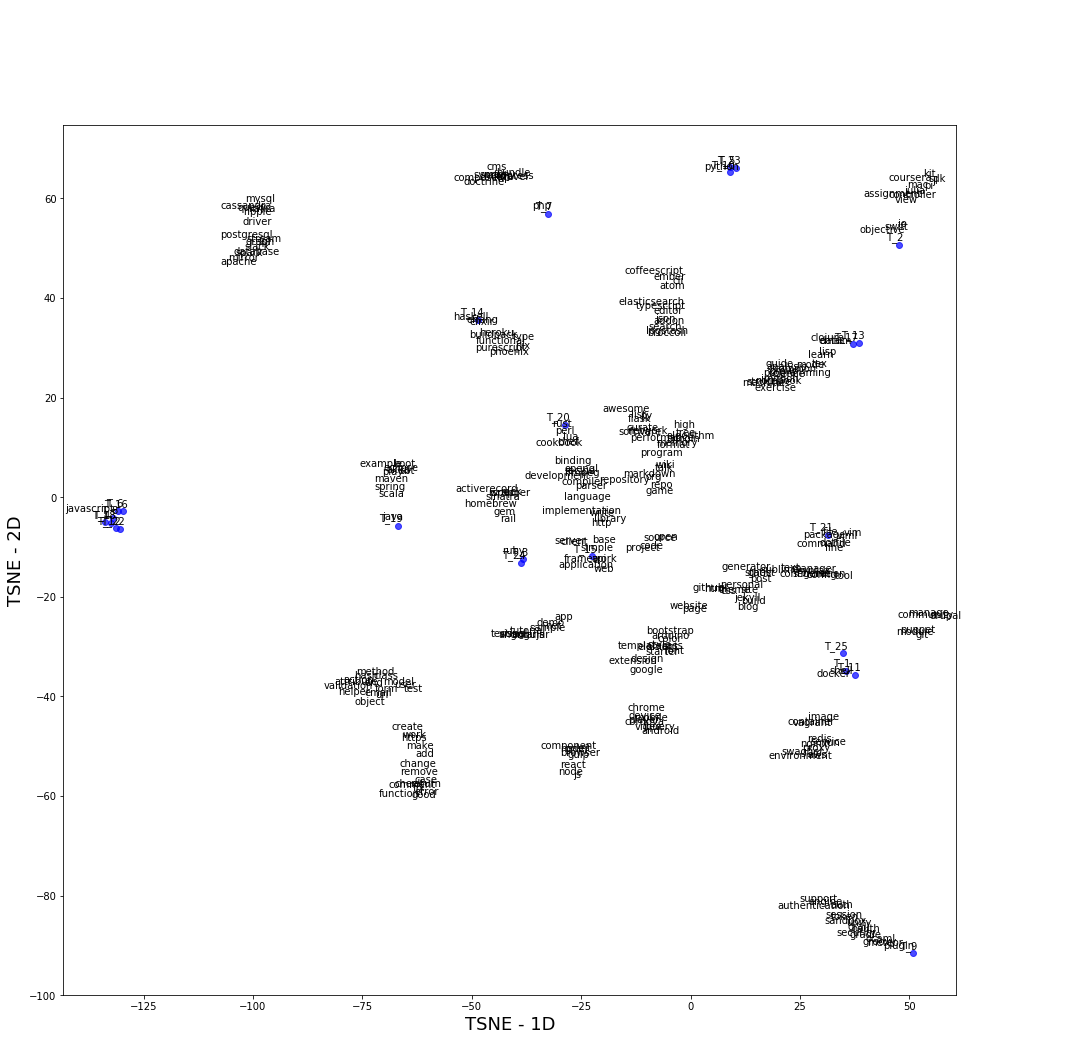

In [0]:
x = tsne_topicWords_5[:,0]
y = tsne_topicWords_5[:,1]

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    if i > df_final.shape[0] - k - 1:
        plt.scatter(x[i],y[i], c="blue", alpha = 0.7)
    #else:
        #plt.scatter(x[i],y[i], c="red", alpha = 0.5)
    plt.annotate(df_final.index[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset pixels', ha='right', va='bottom')
plt.xlabel('TSNE - 1D', fontsize=18)
plt.ylabel('TSNE - 2D', fontsize=18)
plt.show()

# Run PCA on Topic_words + Topic embeddings

In [0]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_final)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

x = pca_result[:,0]
y = pca_result[:,1] 
z = pca_result[:,2]

Explained variation per principal component: [0.26492774 0.20767059 0.18820894]


# Visualize PCA results

Visualize 1st vs. 2nd Princ. Comp

In [0]:
plt.figure(figsize=(15, 15)) 
for i in range(len(x)):
    if i > df_final.shape[0] - k - 1:
        plt.scatter(x[i],y[i], c="blue")
    else :
        plt.scatter(x[i],y[i], c="red")
    plt.annotate(df_final.index[i], xy=(x[i], y[i]), xytext=(5, 2),
                textcoords='offset points', ha='right', va='bottom')
plt.xlabel('1st PC', fontsize=18)
plt.ylabel('2nd PC', fontsize=18)
plt.show()

Visualize 1st vs. 3rd Princ. Comp

In [0]:
plt.figure(figsize=(15, 15)) 
for i in range(len(x)):
    if i > df_final.shape[0] - k - 1:
        plt.scatter(x[i],z[i], c="blue")
    else :
        plt.scatter(x[i],z[i], c="red")
    plt.annotate(df_final.index[i], xy=(x[i], z[i]), xytext=(5, 2),
                textcoords='offset points', ha='right', va='bottom')
plt.xlabel('1st PC', fontsize=18)
plt.ylabel('3rd PC', fontsize=18)
plt.show()

Visualize 2nd vs. 3rd Princ. Comp

In [0]:
plt.figure(figsize=(15, 15)) 
for i in range(len(y)):
    if i > df_final.shape[0] - k - 1:
        plt.scatter(y[i],z[i], c="blue")
    else :
        plt.scatter(y[i],z[i], c="red")
    plt.annotate(df_final.index[i], xy=(y[i], z[i]), xytext=(5, 2),
                textcoords='offset points', ha='right', va='bottom')
plt.xlabel('2nd PC', fontsize=18)
plt.ylabel('3rd PC', fontsize=18)
plt.show()